**[LSE-01]** モジュールをインポート

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# jupyter notebook上にグラフを表示するために必要
%matplotlib inline

**[LSE-02]** Placeholder x の定義
* トレーニングセットのデータを保存する変数をTensorflowでは「Placeholder」と呼ぶ
* [データ数, パラメータ数]であり、データ数にNoneを指定することでTensorflowは任意のデータ数を受け入れることができる。

In [2]:
x = tf.placeholder(tf.float32, [None, 5])

**[LSE-03]** Variable w を定義
* 最適化を実施するパラメータ(重み、パラメータ、...etc)をTensorflowでは「Variable」と呼ぶ

In [3]:
w = tf.Variable(tf.zeros([5, 1]))

**[LSE-04]** 計算式 y を定義
* matmul = matrix multiplication(行列積)、numpyのdot()と同じ処理

In [4]:
y = tf.matmul(x, w)

**[LSE-05]** Placeholder t を定義
* 教師データ: ここでは毎月の平均気温
* 同様にして任意のデータ数を受け入れられる様にする。

In [5]:
t = tf.placeholder(tf.float32, [None, 1])

**[LSE-06]** 誤差関数 loss を定義
* 誤差関数を最小二乗法とする。
* reduce_sum: 全ての要素で和を算出する。
* square: 要素毎の二乗を算出する。$(y_n - t_n)^2$

In [6]:
loss = tf.reduce_sum(tf.square(y-t))

**[LSE-07]** トレーニングアルゴリズム train_step を定義
* 最適化アルゴリズムとしてAdamを使用する。

| #|Optimizer name              |Description                                     |引数                  |
|-:|:----------------------------------|:--------------------------------------------------|:-----------------------|
| 1|GradientDescentOptimizer|勾配降下法によるオプティマイザ                |学習率               |
| 2|AdagradOptimizer           |AdaGrad法によるオプティマイザ               |学習率               |
| 3|MomentumOptimizer        |モメンタム法によるオプティマイザ              |学習率、モーメンタム|
| 4|AdamOptimizer              |Adam法                                         |                        |
| 5|FtrlOptimizer                 |Follow the Regularized Leaderアルゴリズム|学習率                |
| 6|RMSPropOptimizer           |学習率の調整を自動化したアルゴリズム       |学習率                |

In [7]:
train_step = tf.train.AdamOptimizer().minimize(loss)

**[LSE-08]** セッションを用意して、Variableを初期化

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

**[LSE-09]** トレーニングセットのデータを用意する。
* テストデータを$1 \times 12$行列から$12 \times 1$行列へリシェイプする。
* パラメータの初期値を設定する。

``` python
# enumerate(): ループする際にインデックスつきで要素を得る
list = ['a', 'b', 'c']
for (i, x) in enumerate(list):
    print i,x

# 実行結果
# 0 a
# 1 b
# 2 c
```

In [9]:
train_t = np.array([5.2, 5.7, 8.6, 14.9, 18.2, 20.4,
                    25.5, 26.4, 22.8, 17.5, 11.1, 6.6])
train_t = train_t.reshape([12,1])

train_x = np.zeros([12, 5])
for row, month in enumerate(range(1, 13)):
    for col, n in enumerate(range(0, 5)):
        train_x[row][col] = month**n

**[LSE-10]** 勾配降下法によるパラメーターの最適化を100000回繰り返す。
* Session.run()で実行
* Sessionの実行時にfeed_dictを利用してplaceholderを受け渡す。

In [10]:
i = 0
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f' % (i, loss_val))

Step: 10000, Loss: 31.033054
Step: 20000, Loss: 29.295877
Step: 30000, Loss: 28.028336
Step: 40000, Loss: 26.861082
Step: 50000, Loss: 26.942287
Step: 60000, Loss: 24.808706
Step: 70000, Loss: 23.841579
Step: 80000, Loss: 22.980116
Step: 90000, Loss: 22.432549
Step: 100000, Loss: 21.466858


**[LSE-11]** さらに100000回繰り返す。

In [11]:
for _ in range(100000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 10000 == 0:
        loss_val = sess.run(loss, feed_dict={x:train_x, t:train_t})
        print ('Step: %d, Loss: %f' % (i, loss_val))

Step: 110000, Loss: 20.771400
Step: 120000, Loss: 21.023464
Step: 130000, Loss: 19.535839
Step: 140000, Loss: 19.044182
Step: 150000, Loss: 18.485485
Step: 160000, Loss: 18.019890
Step: 170000, Loss: 17.587936
Step: 180000, Loss: 17.185965
Step: 190000, Loss: 16.814537
Step: 200000, Loss: 16.498344


**[LSE-12]** トレーニング後のパラメーターの値を確認

In [12]:
w_val = sess.run(w)
print (w_val)

[[ 6.10159922]
 [-4.03723049]
 [ 2.50909233]
 [-0.2815375 ]
 [ 0.00833718]]


**[LSE-13]** トレーニング後のパラメーターを用いて、予測気温を計算する関数を定義する。

In [13]:
def predict(x):
    result = 0.0
    for n in range(0, 5):
        result += w_val[n][0] * x**n
    return result

**[LSE-14]** 予測気温のグラフを描画する。

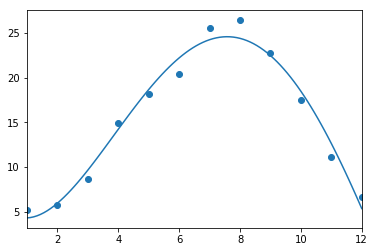

In [14]:
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
subplot.set_xlim(1,12)
subplot.scatter(range(1,13), train_t)
linex = np.linspace(1,12,100)
liney = predict(linex)
subplot.plot(linex, liney)